<a href="https://colab.research.google.com/github/SebasM2000/DataBase_Sttcs/blob/main/comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
%cd /content/gdrive/MyDrive/parcial_computac/DataBase_Sttcs

! git pull

Mounted at /content/gdrive
/content/gdrive/MyDrive/parcial_computac/DataBase_Sttcs
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/SebasM2000/DataBase_Sttcs
   d4369da..9af3448  main       -> origin/main
Updating d4369da..9af3448
error: Your local changes to the following files would be overwritten by merge:
	comp.ipynb
Please commit your changes or stash them before you merge.
Aborting


In [ ]:
# Librerías
%autosave 60
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

Autosaving every 60 seconds


> **Nota:** En este trabajo, se eligieron las primeras 31 columnas (que se exponen en las siguiente celda) para facilitar el análisis de nuestra base de datos. Además, consideramos que las variables elegidas son las más relevantes para nuestro estudio.

In [ ]:
# Abriendo archivo csv
datos = pd.read_csv("METABRIC_RNA_Mutation.csv")
datos.columns[:31]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

> <h2> Primer paso: selección y explicación de variables </h2>
>
> Inicialmente, se seleccionan las variables que se utilizarán y se analiza cada columna individualmente para determinar si tiene un significado coherente en el modelo que se vaya a realizar. Así, la contribución de cada columna es la siguiente:
>
> - **patient_id:** Es la identificación única de cada paciente
> - **type_of_breast_surgery:** Expone el tipo de cirugía a la que fue sometida cada paciente.
> - **cancer_type_detailed:** Contiene la información específica del tipo de cáncer detectado.
> - **cellularity:** Describe las celulas cancerosas que se detectan en el tumor.
> - **neoplasm_histologic_grade:** Describe el aspecto de las células cancerosas en comparación con las células sana de 1 a 3.
> - **lymph_nodes_examined_positive:** Describe cuantos ganglios linfáticos han detectado células cancerosas.
> - **nottingham_prognostic_index:** Evalua el grado de deformacion de las celulas de 1 a 9.
> - **overall_survival_months:** Determina cuantos meses quedan de vida en los pacientes.
> - **tumor_stage:** Describe cuanto cancer hay en el cuerpo clasificando en etapas de 1 a 4.
> - **death_from_cancer:** Pacientes que murieron por cancer o por otras circunstancias.
>
> Esta información es proporcionada por Breastcancer.org.
Donar para apoyar recursos gratuitos y programación para las personas afectadas por cáncer de mama: https://give.breastcancer.org/give/297660/#!/donation/checkout?c_src=clipboard&c_src2=text-link

In [ ]:
# Tabla de las variables seleccionadas
analisis = pd.DataFrame(datos, columns = ["patient_id","overall_survival", 
                                      "cancer_type_detailed", "cellularity","neoplasm_histologic_grade",
                                      "lymph_nodes_examined_positive", "nottingham_prognostic_index",
                                      "tumor_size", "hormone_therapy","death_from_cancer"])
analisis.head()

,patient_id,overall_survival,cancer_type_detailed,cellularity,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,tumor_size,hormone_therapy,death_from_cancer
0,0,1,Breast Invasive Ductal Carcinoma,NaN,3.0,10.0,6.044,22.0,1,Living
1,2,1,Breast Invasive Ductal Carcinoma,High,3.0,0.0,4.020,10.0,1,Living
2,5,0,Breast Invasive Ductal Carcinoma,High,2.0,1.0,4.030,15.0,1,Died of Disease
3,6,1,Breast Mixed Ductal and Lobular Carcinoma,Moderate,2.0,3.0,4.050,25.0,1,Living
4,8,0,Breast Mixed Ductal and Lobular Carcinoma,High,3.0,8.0,6.080,40.0,1,Died of Disease


In [ ]:
analisis.info()
analisis.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patient_id                     1904 non-null   int64  
 1   overall_survival               1904 non-null   int64  
 2   cancer_type_detailed           1889 non-null   object 
 3   cellularity                    1850 non-null   object 
 4   neoplasm_histologic_grade      1832 non-null   float64
 5   lymph_nodes_examined_positive  1904 non-null   float64
 6   nottingham_prognostic_index    1904 non-null   float64
 7   tumor_size                     1884 non-null   float64
 8   hormone_therapy                1904 non-null   int64  
 9   death_from_cancer              1903 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 148.9+ KB


patient_id                        0
overall_survival                  0
cancer_type_detailed             15
cellularity                      54
neoplasm_histologic_grade        72
lymph_nodes_examined_positive     0
nottingham_prognostic_index       0
tumor_size                       20
hormone_therapy                   0
death_from_cancer                 1
dtype: int64

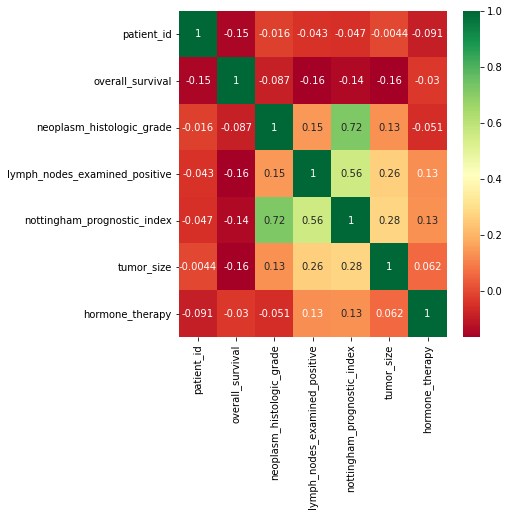

In [79]:
#comparando independencia entre variables
plt.figure(figsize = (6,6))
sns.heatmap(analisis.corr(), annot = True, cmap = "RdYlGn")

> <h2> Segundo paso </h2>
>
> Ahora, se deben eliminar aquellos datos que no aporten a la base de datos, es decir, los valores nulos; ya que pueden generar errores en los diferentes parámetros estadísticos que se calculen como la mediana, el promedio, la media, entre otros.
>
> El propósito de la siguiente celda es eliminar aquellas filas cuyos valores **NO** nulos ocupen al menos un 80% de los datos, ya que consideramos que si faltan al menos dos datos de cada paciente, puede dificultar el diagnóstico del mismo. El resultado fue que se eliminaron 6 filas. Posteriormente, se rectificó que no hubiesen identificaciones duplicadas en la base de datos, ya que es el único dato irrepetible.

In [ ]:
# Porcentaje de valores no nulos para la limpieza
porcentaje = 0.8

# Eliminación de valores nulos con cierto umbral
limpieza_1 = analisis.dropna(thresh = porcentaje*len(analisis.columns))
limpieza_1 = limpieza_1.dropna(thresh = porcentaje*len(analisis), axis = 1)
limpieza_1 = limpieza_1.drop_duplicates(["patient_id"])
limpieza_1

# Nota: Prestar atención a cualquier columna que:
# Esté mal formateada,
# Requiere más datos o mucho procesamiento para convertirse en una característica útil
# Contiene información redundante

,patient_id,overall_survival,cancer_type_detailed,cellularity,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,tumor_size,hormone_therapy,death_from_cancer
0,0,1,Breast Invasive Ductal Carcinoma,NaN,3.0,10.0,6.044,22.0,1,Living
1,2,1,Breast Invasive Ductal Carcinoma,High,3.0,0.0,4.020,10.0,1,Living
2,5,0,Breast Invasive Ductal Carcinoma,High,2.0,1.0,4.030,15.0,1,Died of Disease
3,6,1,Breast Mixed Ductal and Lobular Carcinoma,Moderate,2.0,3.0,4.050,25.0,1,Living
4,8,0,Breast Mixed Ductal and Lobular Carcinoma,High,3.0,8.0,6.080,40.0,1,Died of Disease
...,...,...,...,...,...,...,...,...,...,...
1899,7295,1,Breast Invasive Lobular Carcinoma,High,3.0,1.0,5.050,25.0,1,Living
1900,7296,0,Breast Invasive Ductal Carcinoma,High,3.0,1.0,5.040,20.0,0,Died of Disease
1901,7297,0,Breast Invasive Ductal Carcinoma,High,3.0,45.0,6.050,25.0,1,Died of Disease
1902,7298,0,Breast Invasive Ductal Carcinoma,Moderate,2.0,12.0,5.050,25.0,1,Died of Other Causes


> <h2> Propuesta de ecuación </h2>
>
> En nuestro análisis, decidimos predecir **el grado histológico del neplasma (neoplasm_histologic_grade)**. Inicialmente, tenemos 4 variables categoricas, ya que con ellas solo obtenemos información cualitativa; por lo tanto, se las convierte
en variables numéricas para que el algoritmo sea capaz de reconocerlas. Para ello, se utilizará un sistema de codificacion 
dummy para las siguientes variables:
>
> - type_of_breast_surgery[T.MASTECTOMY]                                
> - cancer_type_detailed[T.Breast Invasive Ductal Carcinoma]            
> - cancer_type_detailed[T.Breast Invasive Lobular Carcinoma]           
> - cancer_type_detailed[T.Breast Invasive Mixed Mucinous Carcinoma]    
> - cancer_type_detailed[T.Breast Mixed Ductal and Lobular Carcinoma]   
> - cancer_type_detailed[T.Metaplastic Breast Cancer]                    
> - cellularity[T.Low]                                                   
> - cellularity[T.Moderate]                                              
> - death_from_cancer[T.Died of Other Causes]                            
> - death_from_cancer[T.Living]

In [35]:
# Planteamiento de ecuación
# ===============================================================================================

# Creación de vector de variable dependiente
var_dep = "overall_survival"
y = limpieza_1.loc[:, var_dep]

# Variables categóricas
variables = pd.get_dummies(data = limpieza_1, columns = ['cancer_type_detailed',
                                                     'cellularity', 'death_from_cancer'])

# Renombrando columnas
# "type_of_breast_surgery_BREAST CONSERVING":"type_of_breast_surgery_BREAST_CONSERVING",
analisis1 = variables.rename(columns = {"cancer_type_detailed_Breast Invasive Ductal Carcinoma": "ctd_Breast_Invasive_Ductal_Carcinoma",
                                   "cancer_type_detailed_Breast Invasive Lobular Carcinoma": "ctd_Breast_Invasive_Lobular_Carcinoma",
                                  "cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma": "ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma",
                                  "cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma": "ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma",
                                  "cancer_type_detailed_Metaplastic Breast Cancer": "ctd_Metaplastic_Breast_Cancer",
                                  "death_from_cancer_Died of Disease": "death_from_cancer_Died_of_Disease",
                                  "death_from_cancer_Died of Other Causes": "death_from_cancer_Died_of_Other_Causes"})
analisis2 = analisis1.drop(var_dep, axis = 1)
analisis2

,patient_id,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,tumor_size,hormone_therapy,cancer_type_detailed_Breast,ctd_Breast_Invasive_Ductal_Carcinoma,ctd_Breast_Invasive_Lobular_Carcinoma,ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma,ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma,ctd_Metaplastic_Breast_Cancer,cellularity_High,cellularity_Low,cellularity_Moderate,death_from_cancer_Died_of_Disease,death_from_cancer_Died_of_Other_Causes,death_from_cancer_Living
0,0,3.0,10.0,6.044,22.0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,2,3.0,0.0,4.020,10.0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,5,2.0,1.0,4.030,15.0,1,0,1,0,0,0,0,1,0,0,1,0,0
3,6,2.0,3.0,4.050,25.0,1,0,0,0,0,1,0,0,0,1,0,0,1
4,8,3.0,8.0,6.080,40.0,1,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,3.0,1.0,5.050,25.0,1,0,0,1,0,0,0,1,0,0,0,0,1
1900,7296,3.0,1.0,5.040,20.0,0,0,1,0,0,0,0,1,0,0,1,0,0
1901,7297,3.0,45.0,6.050,25.0,1,0,1,0,0,0,0,1,0,0,1,0,0
1902,7298,2.0,12.0,5.050,25.0,1,0,1,0,0,0,0,0,0,1,0,1,0


In [91]:
from scipy import stats
#Normalidad de los residuos D'Agostino's K-squared test
k2, p_value = stats.normaltest(analisis2.nottingham_prognostic_index )
print(f"nottingham_prognostic_index: Estadítico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(analisis2.neoplasm_histologic_grade )
print(f"neoplasm_histologic_grade: Estadítico = {k2}, p-value = {p_value}")




k2, p_value = stats.normaltest(analisis2.nottingham_prognostic_index   )
print(f"nottingham_prognostic_index : Estadítico = {k2}, p-value = {p_value}")


k2, p_value = stats.normaltest(analisis2.lymph_nodes_examined_positive       )
print(f"lymph_nodes_examined_positive : Estadítico = {k2}, p-value = {p_value}")

k2, p_value = stats.normaltest(analisis2.tumor_size      )
print(f"tumor_size : Estadítico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(analisis2.lymph_nodes_examined_positive       )
print(f"lymph_nodes_examined_positive : Estadítico = {k2}, p-value = {p_value}")

nottingham_prognostic_index: Estadítico = 14.08499100849108, p-value = 0.0008739429104918542
neoplasm_histologic_grade: Estadítico = nan, p-value = nan
nottingham_prognostic_index : Estadítico = 14.08499100849108, p-value = 0.0008739429104918542
lymph_nodes_examined_positive : Estadítico = 1573.4760743914558, p-value = 0.0
tumor_size : Estadítico = nan, p-value = nan
lymph_nodes_examined_positive : Estadítico = 1573.4760743914558, p-value = 0.0


In [ ]:
# Modelo de regresión lineal
def modelo():
    xi = [var_dep + "~"]
    for i in analisis2:
        xi[0] = xi[0] + "+" + i
    return xi[0]

MRL = smf.ols(modelo(), analisis1).fit()
MRL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_survival   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.863e+30
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:27:53   Log-Likelihood:                 58387.
No. Observations:                1815   AIC:                        -1.167e+05
Df Residuals:                    1797   BIC:                        -1.166e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                       5.69e-16   2.75e-15      0.207      0.836   -4.82e-15    5.96e-15
patient_id                                     3.257e-19   2.66e-20     12.228      0.000    2.73e-19    3.78e-19
neoplasm_histologic_grade                       -3.4e-16   1.63e-16     -2.088      0.037   -6.59e-16   -2.07e-17
lymph_nodes_examined_positive                  3.383e-16   2.18e-17     15.490      0.000    2.95e-16    3.81e-16
nottingham_prognostic_index                   -1.029e-15   1.25e-16     -8.262      0.000   -1.27e-15   -7.84e-16
tumor_size                                      1.31e-16    4.3e-18     30.454      0.000    1.23e-16    1.39e-16
hormone_therapy                               -6.549e-17   1.32e-16     -0.496      0.620   -3.25e-16    1.94e-16
cancer_type_detailed_Breast                    -1.18e-15   9.84e-16     -1.198      0.231   -3.11e-15    7.51e-16
ctd_Breast_Invasive_Ductal_Carcinoma          -7.798e-16      7e-16     -1.114      0.265   -2.15e-15    5.93e-16
ctd_Breast_Invasive_Lobular_Carcinoma         -2.706e-16   7.34e-16     -0.369      0.712   -1.71e-15    1.17e-15
ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma  -5.551e-16   9.13e-16     -0.608      0.543   -2.34e-15    1.23e-15
ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma  7.633e-17   7.22e-16      0.106      0.916   -1.34e-15    1.49e-15
ctd_Metaplastic_Breast_Cancer                  -3.98e-16   3.91e-30  -1.02e+14      0.000   -3.98e-16   -3.98e-16
cellularity_High                              -3.469e-16   3.83e-16     -0.905      0.366    -1.1e-15    4.05e-16
cellularity_Low                               -4.163e-16   4.16e-16     -1.000      0.318   -1.23e-15    4.01e-16
cellularity_Moderate                           -4.51e-16   3.85e-16     -1.171      0.242   -1.21e-15    3.04e-16
death_from_cancer_Died_of_Disease             -8.708e-16   2.61e-15     -0.333      0.739   -5.99e-15    4.25e-15
death_from_cancer_Died_of_Other_Causes        -1.041e-17   2.61e-15     -0.004      0.997   -5.13e-15    5.11e-15
death_from_cancer_Living                          1.0000   2.61e-15   3.83e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                      900.439   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9038.695
Skew:                          -2.095   Prob(JB):                         0.00
Kurtosis:                      13.098   Cond. No.                     1.78e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[

In [59]:
# Eliminando columnas cuyo P-valor supera 0.05
def limpiador_pvalor(base_datos, regresion):
    for i in base_datos:
        if regresion.pvalues[i] > 0.05:
            base_datos = base_datos.drop([i], axis = 1)
    return base_datos

analisis2 = limpiador_pvalor(analisis2, MRL)
analisis3 = pd.concat([analisis2, y], axis = 1)
analisis3

,patient_id,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,tumor_size,ctd_Metaplastic_Breast_Cancer,death_from_cancer_Living,overall_survival
0,0,3.0,10.0,6.044,22.0,0,1,1
1,2,3.0,0.0,4.020,10.0,0,1,1
2,5,2.0,1.0,4.030,15.0,0,0,0
3,6,2.0,3.0,4.050,25.0,0,1,1
4,8,3.0,8.0,6.080,40.0,0,0,0
...,...,...,...,...,...,...,...,...
1899,7295,3.0,1.0,5.050,25.0,0,1,1
1900,7296,3.0,1.0,5.040,20.0,0,0,0
1901,7297,3.0,45.0,6.050,25.0,0,0,0
1902,7298,2.0,12.0,5.050,25.0,0,0,0


In [ ]:
# Regresión con las variables contribuyentes al modelo
MRL_2 = smf.ols(modelo(), analisis3).fit()
MRL_2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_survival   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.779e+32
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:27:53   Log-Likelihood:                 60912.
No. Observations:                1815   AIC:                        -1.218e+05
Df Residuals:                    1808   BIC:                        -1.218e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      8.674e-16      8e-17     10.847      0.000    7.11e-16    1.02e-15
patient_id                    -1.842e-19   6.48e-21    -28.432      0.000   -1.97e-19   -1.72e-19
neoplasm_histologic_grade     -7.737e-16   3.92e-17    -19.744      0.000   -8.51e-16   -6.97e-16
lymph_nodes_examined_positive -6.072e-17   5.39e-18    -11.275      0.000   -7.13e-17   -5.02e-17
nottingham_prognostic_index    4.007e-16   2.99e-17     13.415      0.000    3.42e-16    4.59e-16
tumor_size                     1.811e-17   1.06e-18     17.120      0.000     1.6e-17    2.02e-17
ctd_Metaplastic_Breast_Cancer          0          0        nan        nan           0           0
death_from_cancer_Living          1.0000   3.17e-17   3.15e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      103.522   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.602
Skew:                          -0.486   Prob(JB):                     7.29e-34
Kurtosis:                       4.036   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
analisis3.info()
analisis3.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 1903
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patient_id                     1903 non-null   int64  
 1   neoplasm_histologic_grade      1832 non-null   float64
 2   lymph_nodes_examined_positive  1903 non-null   float64
 3   nottingham_prognostic_index    1903 non-null   float64
 4   tumor_size                     1884 non-null   float64
 5   ctd_Metaplastic_Breast_Cancer  1903 non-null   uint8  
 6   death_from_cancer_Living       1903 non-null   uint8  
 7   overall_survival               1903 non-null   int64  
dtypes: float64(4), int64(2), uint8(2)
memory usage: 107.8 KB


patient_id                        0
neoplasm_histologic_grade        71
lymph_nodes_examined_positive     0
nottingham_prognostic_index       0
tumor_size                       19
ctd_Metaplastic_Breast_Cancer     0
death_from_cancer_Living          0
overall_survival                  0
dtype: int64

In [53]:

NOX_predict = MRL_2.predict(analisis3[["patient_id", "neoplasm_histologic_grade", "lymph_nodes_examined_positive",
                                       "ctd_Metaplastic_Breast_Cancer", "death_from_cancer_Living"]])
analisis3["NOX_predict"] = NOX_predict

x = analisis3["overall_survival"] #todos los valores de la variable NOx
y = analisis3["NOX_predict"] #todos los valores de la variable Nox estimada con MLRM

#Calculando los coeficientes del ajuste de regresión:
a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio
r = np.corrcoef(x, y) # r = coeficiente de correlación

plt.subplot(111)
plt.scatter(x,y, color="r", s=20)
plt.xlabel("NO$_x$ (µg/$m^3$)")
plt.ylabel("NO$_x$ Predict (µg/$m^3$)")
plt.plot(x, a * x + b, color="skyblue")
plt.text(10,55, 'r = {0:2.2f}'.format(r[0,1]))
#plt.text(10,55, 'NO$_x$ = {0:2.2f} NO$_x$ Predict + {1:2.3f}'.format(a,b))
plt.savefig("C:/Users/heber/Desktop/CURSO_GRAFICOS_EN_PYTHON/Regresión Lineal Multiple/nox_predict.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.show()

PatsyError: ignored

In [18]:
from sklearn import preprocessing #escalando datos analisis2

d = preprocessing.MinMaxScaler(feature_range = (0,1))

col = analisis2.columns
res = d.fit_transform(analisis2)

scaled_df = pd.DataFrame(res, columns=col)
scaled_df.head()

,patient_id,overall_survival,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,tumor_size,hormone_therapy,cancer_type_detailed_Breast,ctd_Breast_Invasive_Ductal_Carcinoma,ctd_Breast_Invasive_Lobular_Carcinoma,ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma,ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma,ctd_Metaplastic_Breast_Cancer,cellularity_High,cellularity_Low,cellularity_Moderate,death_from_cancer_Died_of_Disease,death_from_cancer_Died_of_Other_Causes,death_from_cancer_Living
0,0.000000,1.0,1.0,0.222222,0.941045,0.116022,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000274,1.0,1.0,0.000000,0.563433,0.049724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.000685,0.0,0.5,0.022222,0.565299,0.077348,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.000822,1.0,0.5,0.066667,0.569030,0.132597,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.001096,0.0,1.0,0.177778,0.947761,0.215470,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


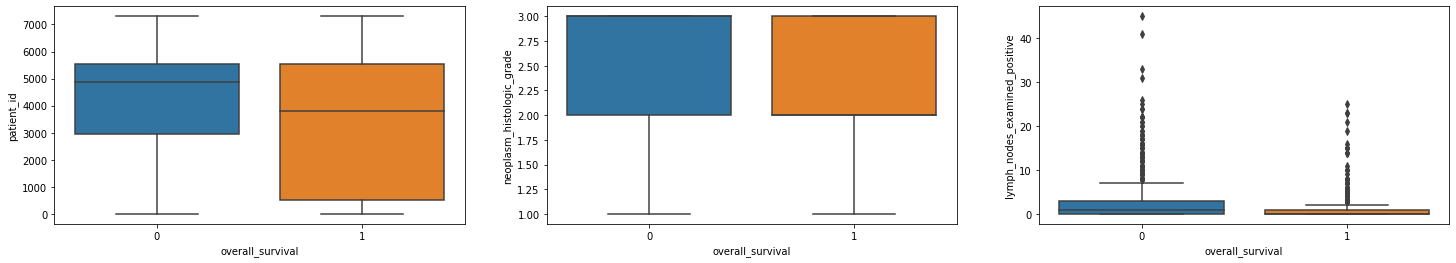

In [19]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(25, 4))
for idx, feature in enumerate(list(analisis3.columns)[:3]):

    sns.boxplot( x='overall_survival', y=feature, data=analisis3, ax=axes[idx])
plt.show()  


 





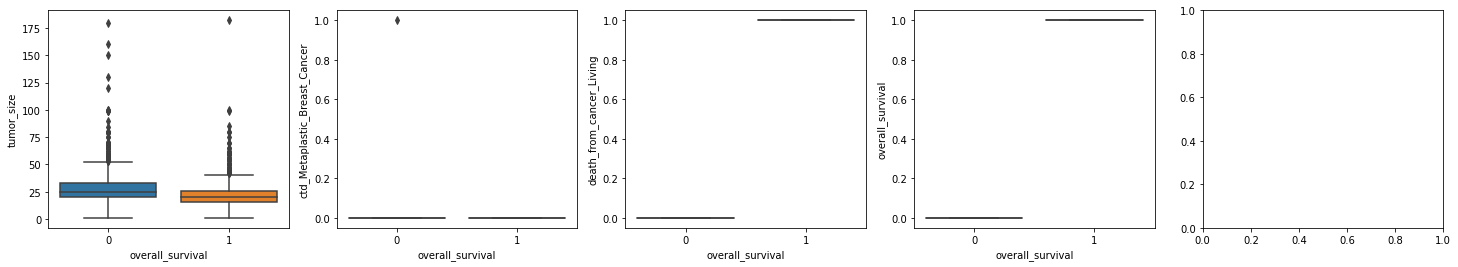

In [24]:
fig, axes = plt.subplots(1, 5, figsize=(25, 4))
for idx1, feature in enumerate(list(analisis3.columns)[4:9]):

    sns.boxplot( x='overall_survival', y=feature, data=analisis3, ax=axes[idx1])
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


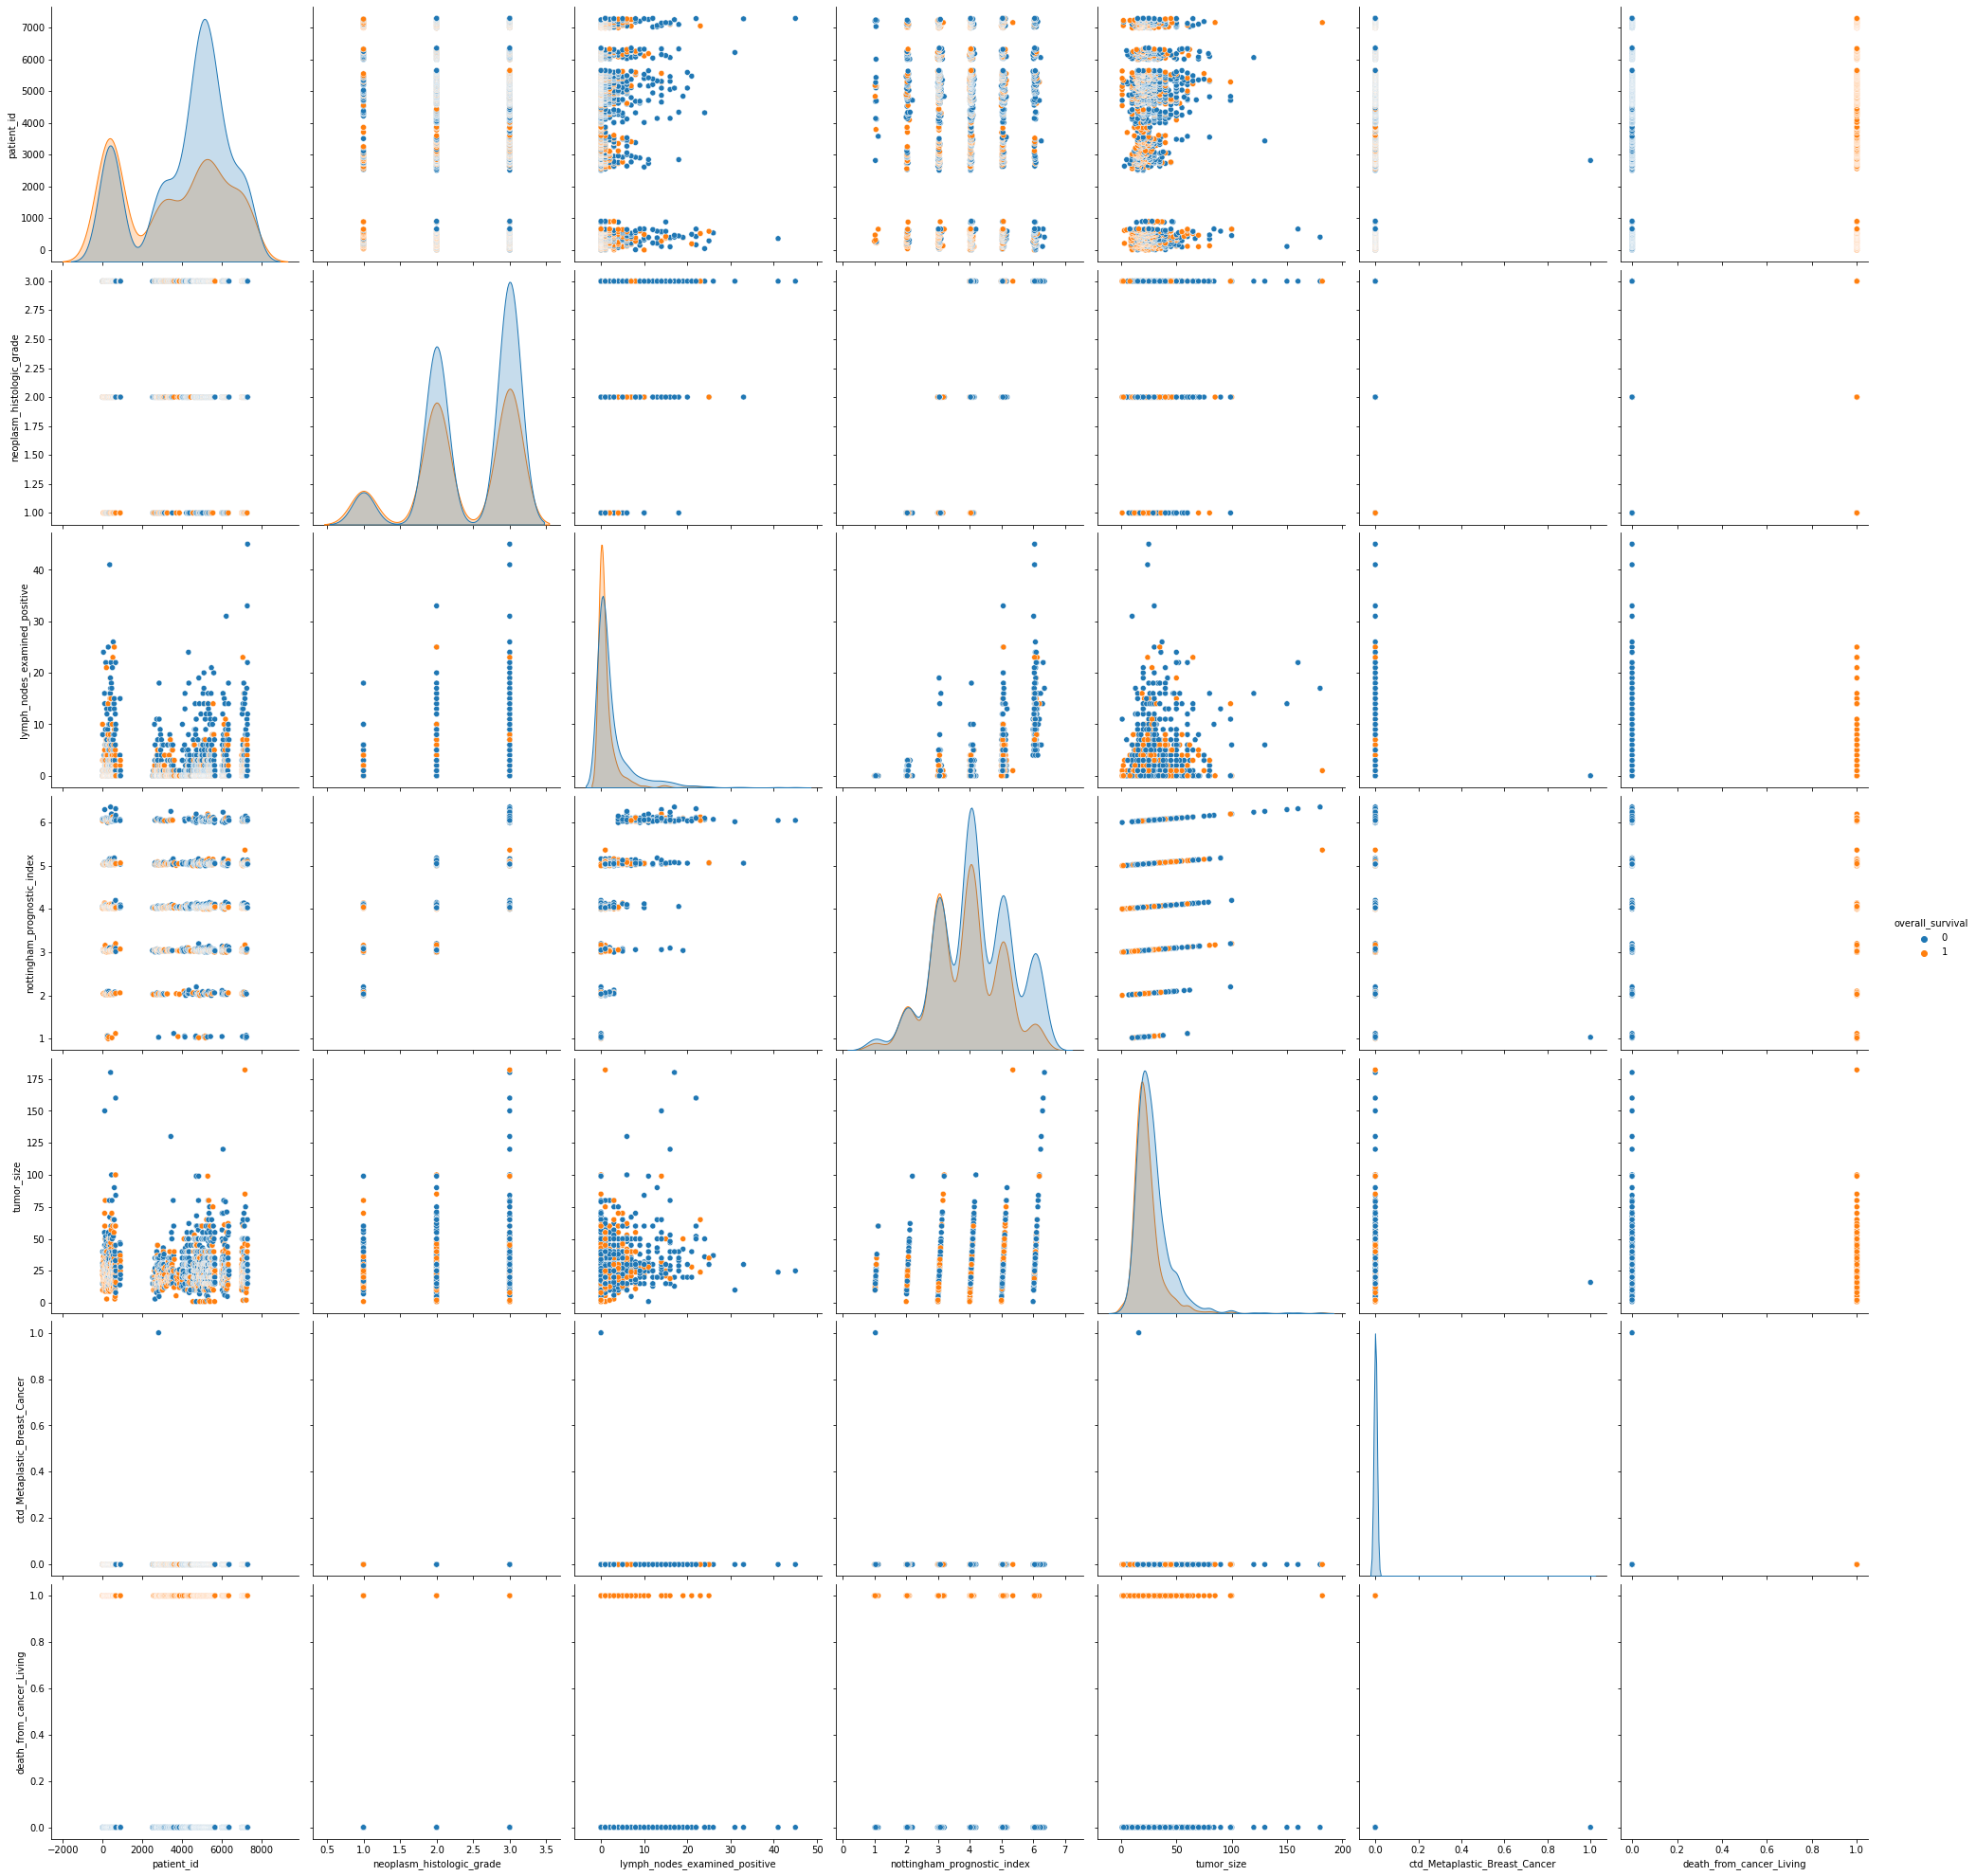

In [21]:
sns.pairplot(analisis3, hue='overall_survival', size=4)
plt.show()


> <h1> Cosas por hacer </h1>
>
> <h2> Limpieza de datos </h2>
>
> - Proponer la ecuación lineal
> - Normalizar la base de datos
> - Calcular parámetros estadísticos
>
> <h2> Prueba de hipótesis </h2>
>
> - Plantear hipótesis nula y alternativa
> - Graficar distribución
> - Plantear un modelo que se ajuste a la distribución
> - Aceptar o rechazar hipótesis nula
>
> <h2> Prueba ANOVA </h2>
>
> -